## Current Consumption Evaluation for MQTT and AMQP on the SARA R500S board by UBlox

### Importing the data and cleaning it up

In [10]:
import pandas as pd
import numpy as np

In [73]:
coap_df_0 = pd.read_csv("data/coap_current_consumption_0.csv")
coap_df_1 = pd.read_csv("data/coap_current_consumption_1.csv")
coap_df_2 = pd.read_csv("data/coap_current_consumption_2.csv")
coap_df = pd.concat([coap_df_0, coap_df_1, coap_df_2], axis=0, ignore_index=True)
mqtt_df = pd.read_csv("data/mqtt_current_consumption.csv")

The remainder of this document goes through each of the events of interest for the current consumption measurements and graphs the data.  At the end of the notebook also has some metric rollups that summarizes the major metrics such as average current value and length of the events.  This notebook is not well documented and was primarily used for quick analysis to get some graphs, to perform analysis on your own, this information will be useful as it describes the timestamps for the different events that appear in the data:


The following dictionary contains the timestamps for the events of interest for the mqtt current consumption measurements
```
mqtt_events = { "mqtt_connect": [9750, 15050], 
                "mqtt_single_event": [16750, 21700], 
                "mqtt_single_event_w_data": [26300, 31300],
                "mqtt_location_event": [36000, 41300], 
                "mqtt_multiple_events": [46000, 51300], 
                "mqtt_gps_4_hours": [58300, 189000],
                "mqtt_disconnect": [192870, 197550] }
```
The following dictionary contains the timestamps for the events of interest for the coap current consumption measurements
```
coap_events = { "coap_single_event": [17150, 21620], 
                "coap_single_event_w_data": [24750, 29400],
                "coap_location_event": [32500, 37250], 
                "coap_multiple_events": [40360, 48860], 
                "coap_gps_4_hours": [48860, 598862]}
               ```

### Extract the different events from the MQTT simulation

In [76]:
import matplotlib.pyplot as plt
plt.rc('font', size=16)          # controls default text sizes
plt.rcParams["figure.figsize"] = (20,10)
# prints out the data for a specified time range
def plot_time_range(dataframe, title, time_1, time_2, y_skip, x_skip, x_data = "Time (ms)", y_data = "Current (mA)", column = "Time (ms)"):
    data_slice_1 = dataframe[dataframe[column] >= time_1]
    data_slice_2 = data_slice_1[data_slice_1[column] <= time_2]
    first_val = data_slice_2['Time (ms)'].iloc[0]
    data_slice_2["Time (ms)"] = data_slice_2["Time (ms)"].apply(lambda x: x - first_val)
    ax = data_slice_2.plot(x=x_data, y=y_data, figsize=(20,10), title=title, ylim=(0, max(data_slice_2[y_data]) + 10))
    ax.set_xlabel(x_data)
    ax.set_ylabel(y_data)
    ax.set_yticks([i for i in range(0, int(max(data_slice_2[y_data])), y_skip)])
    ax.set_xticks([i for i in range(int(min(data_slice_2[x_data])), int(max(data_slice_2[x_data])), x_skip)])
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)

<ipython-input-76-7a92fe3ea2e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slice_2["Time (ms)"] = data_slice_2["Time (ms)"].apply(lambda x: x - first_val)


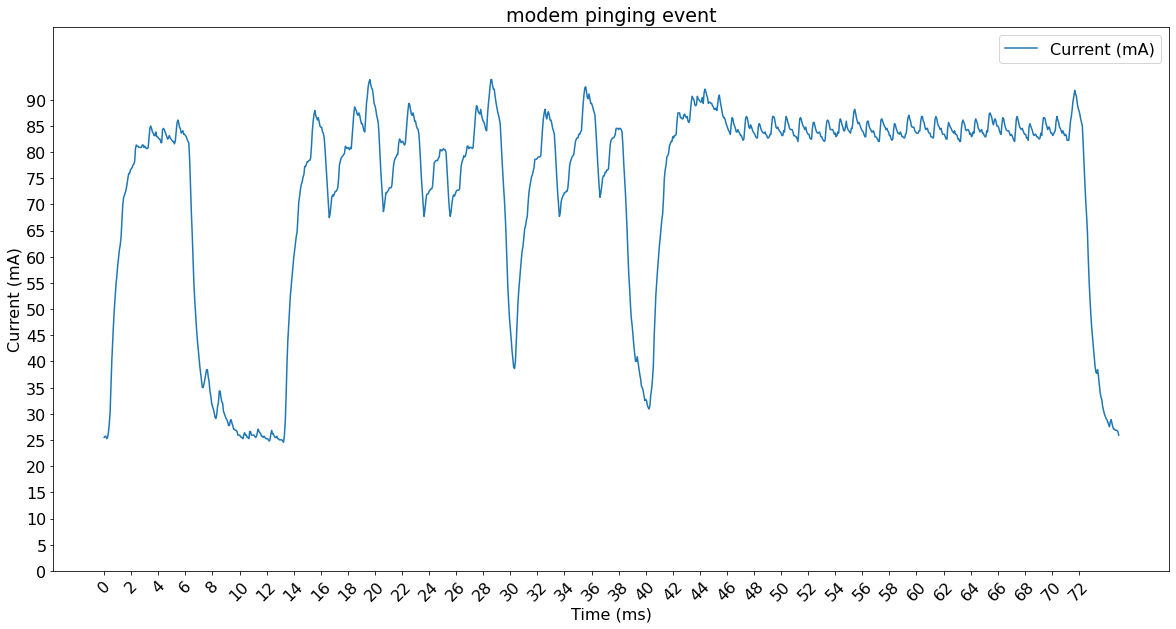

In [77]:
plot_time_range(dataframe=mqtt_df, title="modem pinging event", time_1=190, time_2=265, y_skip=5, x_skip=2)
plt.savefig('modem_ping_event.png', bbox_inches='tight')

<ipython-input-76-7a92fe3ea2e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slice_2["Time (ms)"] = data_slice_2["Time (ms)"].apply(lambda x: x - first_val)


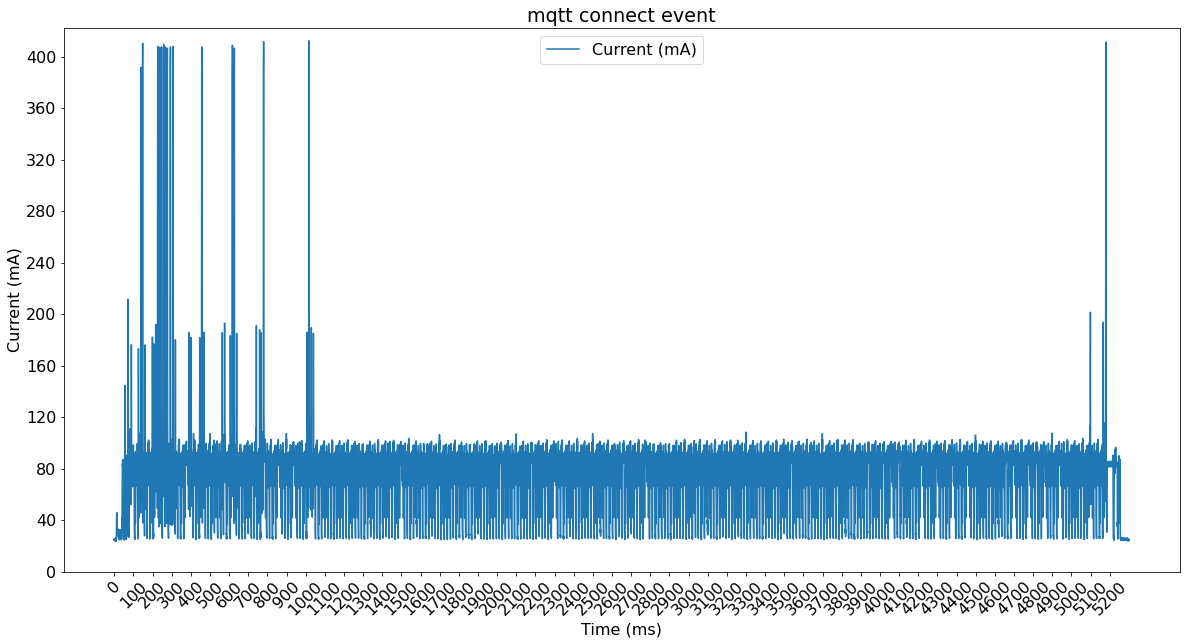

In [78]:
# timeframe for when the board is connecting to the mqtt server
plot_time_range(dataframe=mqtt_df, title="mqtt connect event", time_1=9750, time_2=15050, y_skip=40, x_skip=100)
plt.savefig('mqtt_connect_event.png', bbox_inches='tight')

<ipython-input-76-7a92fe3ea2e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slice_2["Time (ms)"] = data_slice_2["Time (ms)"].apply(lambda x: x - first_val)


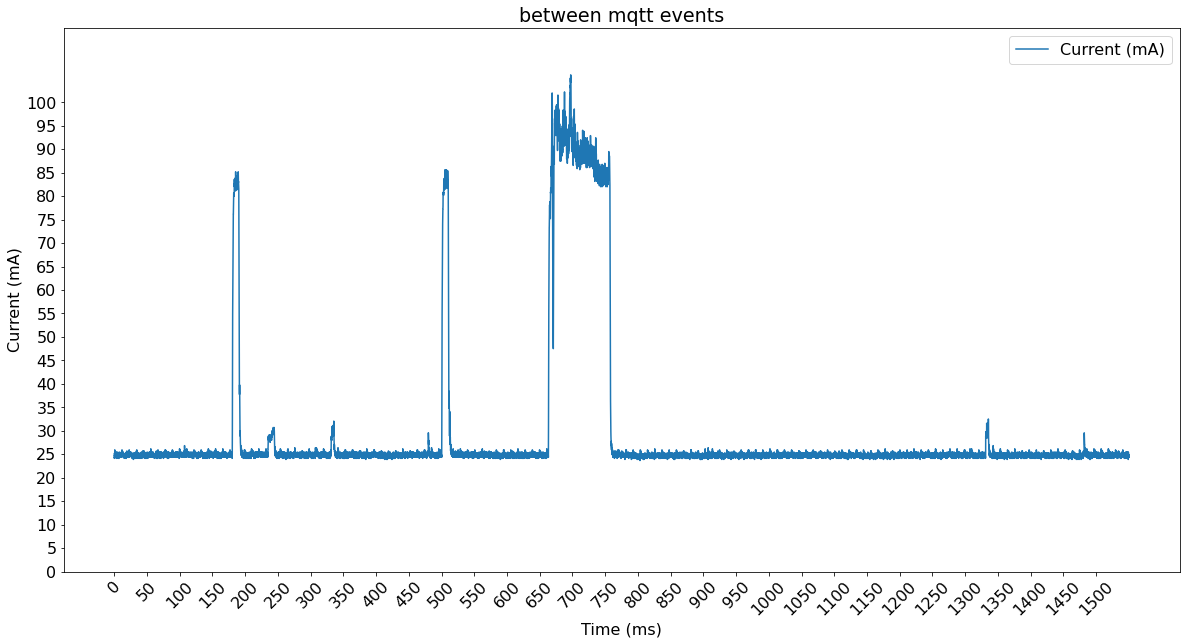

In [79]:
plot_time_range(dataframe=mqtt_df, title="between mqtt events", time_1=15050, time_2=16600, y_skip=5, x_skip=50)

<ipython-input-76-7a92fe3ea2e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slice_2["Time (ms)"] = data_slice_2["Time (ms)"].apply(lambda x: x - first_val)


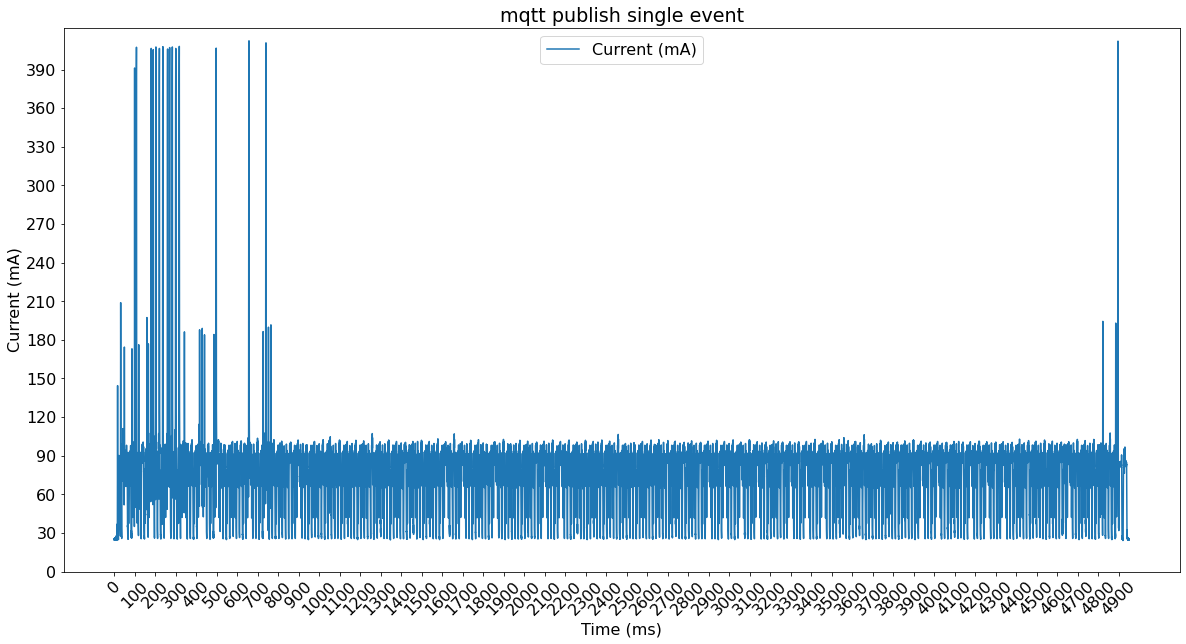

In [80]:
plot_time_range(dataframe=mqtt_df, title="mqtt publish single event", time_1=16750, time_2=21700, y_skip=30, x_skip=100)

<ipython-input-76-7a92fe3ea2e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slice_2["Time (ms)"] = data_slice_2["Time (ms)"].apply(lambda x: x - first_val)


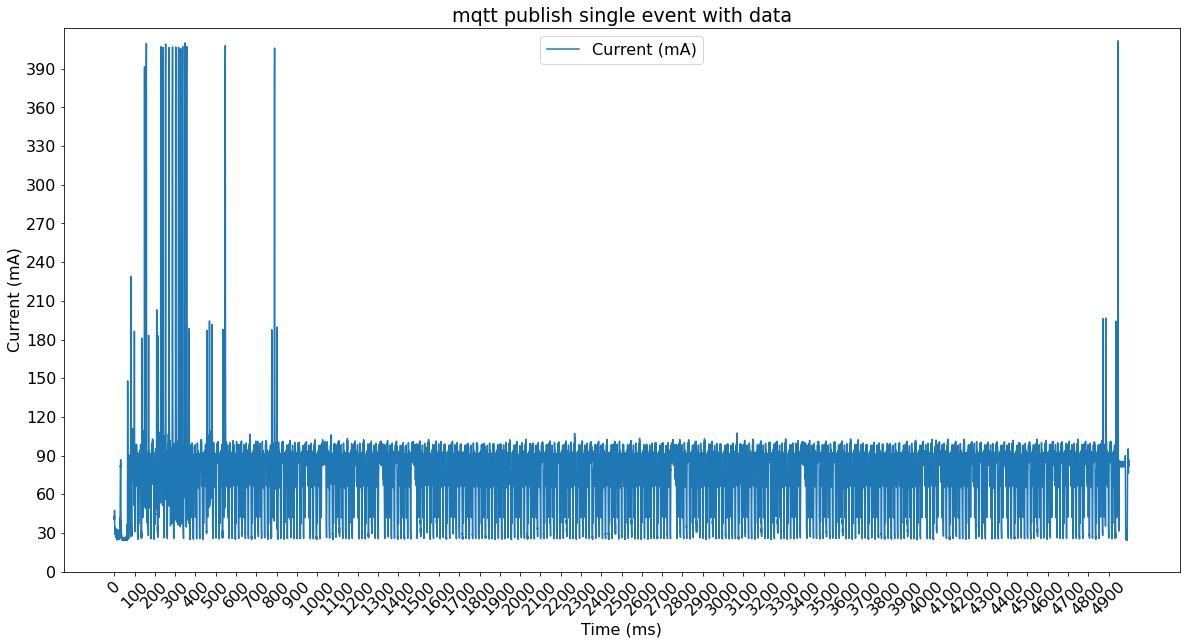

In [81]:
plot_time_range(dataframe=mqtt_df, title="mqtt publish single event with data", time_1=26300, time_2=31300, y_skip=30, x_skip=100)

<ipython-input-76-7a92fe3ea2e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slice_2["Time (ms)"] = data_slice_2["Time (ms)"].apply(lambda x: x - first_val)


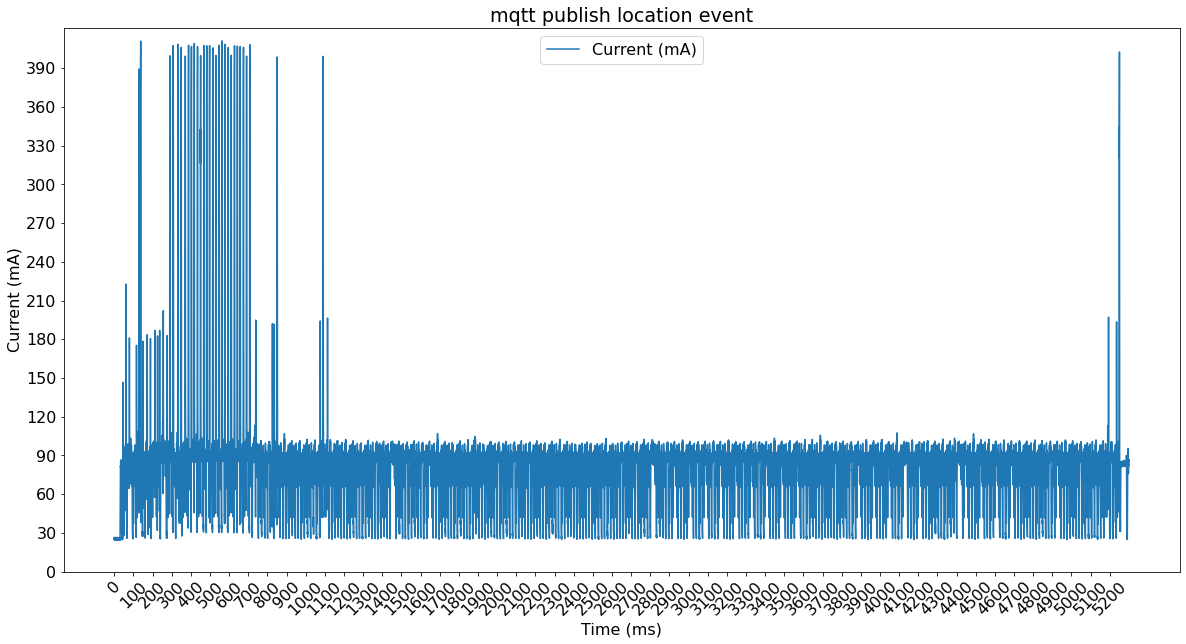

In [82]:
plot_time_range(dataframe=mqtt_df, title="mqtt publish location event", time_1=36000, time_2=41300, y_skip=30, x_skip=100)

<ipython-input-76-7a92fe3ea2e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slice_2["Time (ms)"] = data_slice_2["Time (ms)"].apply(lambda x: x - first_val)


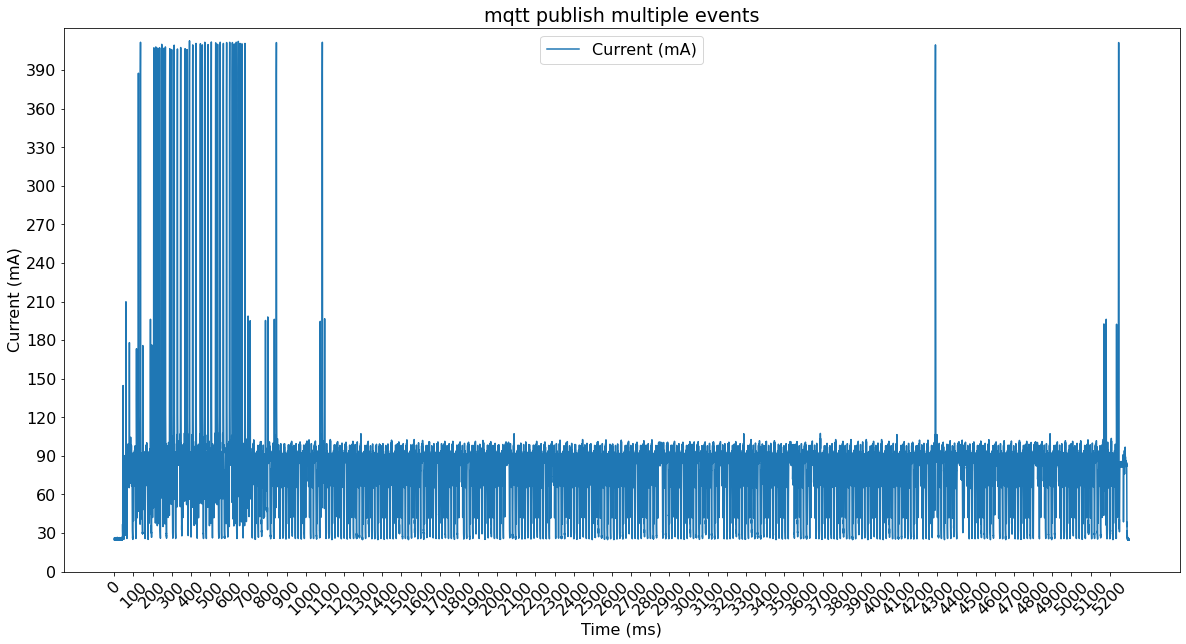

In [83]:
plot_time_range(dataframe=mqtt_df, title="mqtt publish multiple events", time_1=46000, time_2=51300, y_skip=30, x_skip=100)

<ipython-input-76-7a92fe3ea2e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slice_2["Time (ms)"] = data_slice_2["Time (ms)"].apply(lambda x: x - first_val)


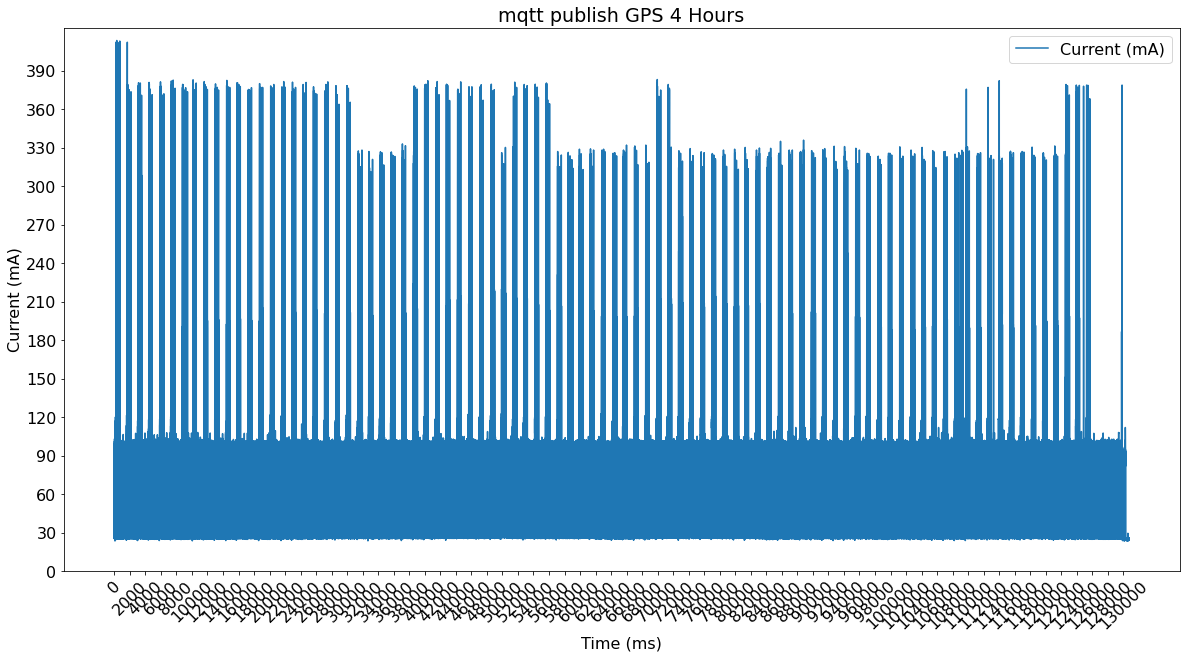

In [84]:
plot_time_range(dataframe=mqtt_df, title="mqtt publish GPS 4 Hours", time_1=58300, time_2=189000, y_skip=30, x_skip=2000)

<ipython-input-76-7a92fe3ea2e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slice_2["Time (ms)"] = data_slice_2["Time (ms)"].apply(lambda x: x - first_val)


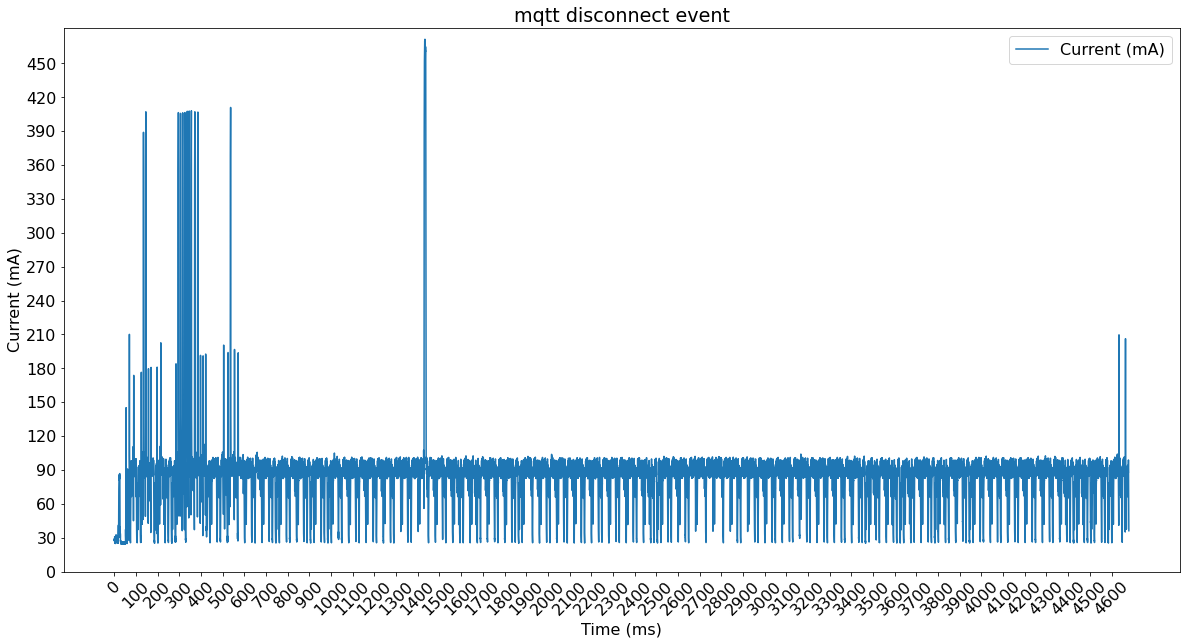

In [85]:
plot_time_range(dataframe=mqtt_df, title="mqtt disconnect event", time_1=192870, time_2=197550, y_skip=30, x_skip=100)
plt.savefig('mqtt_disconnect_event.png', bbox_inches='tight')

### Extract the different events from the CoAP simulation
 - There are no connect and disconnect events since coap is udp based

<ipython-input-76-7a92fe3ea2e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slice_2["Time (ms)"] = data_slice_2["Time (ms)"].apply(lambda x: x - first_val)


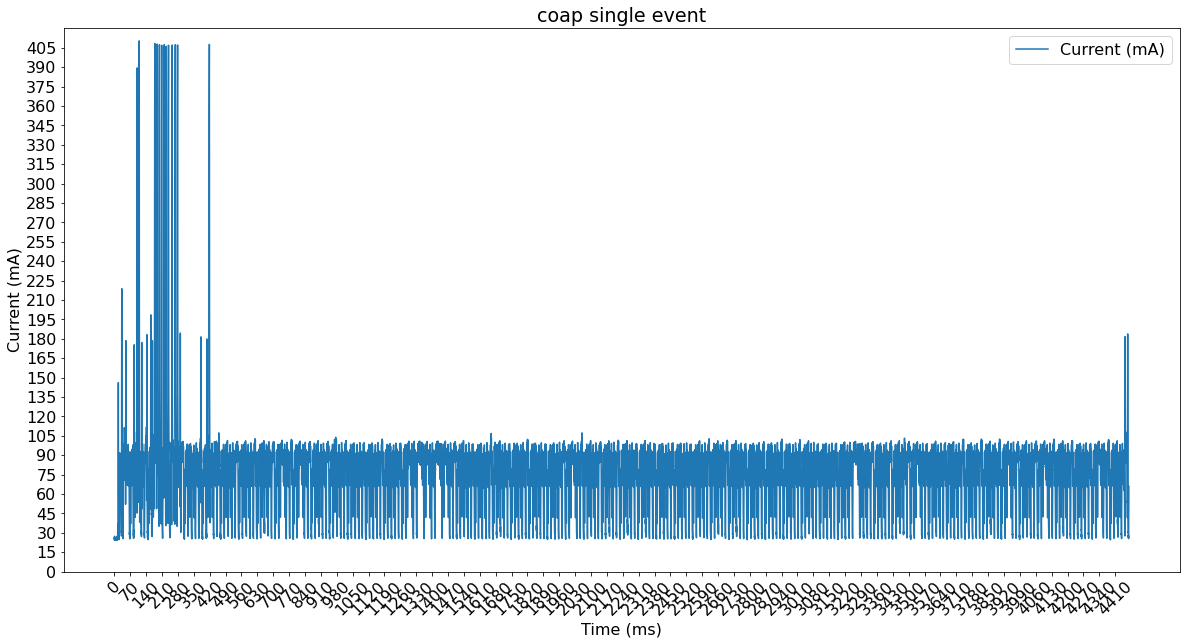

In [86]:
plot_time_range(dataframe=coap_df, title="coap single event", time_1=17150, time_2=21620, y_skip=15, x_skip=70)

<ipython-input-76-7a92fe3ea2e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slice_2["Time (ms)"] = data_slice_2["Time (ms)"].apply(lambda x: x - first_val)


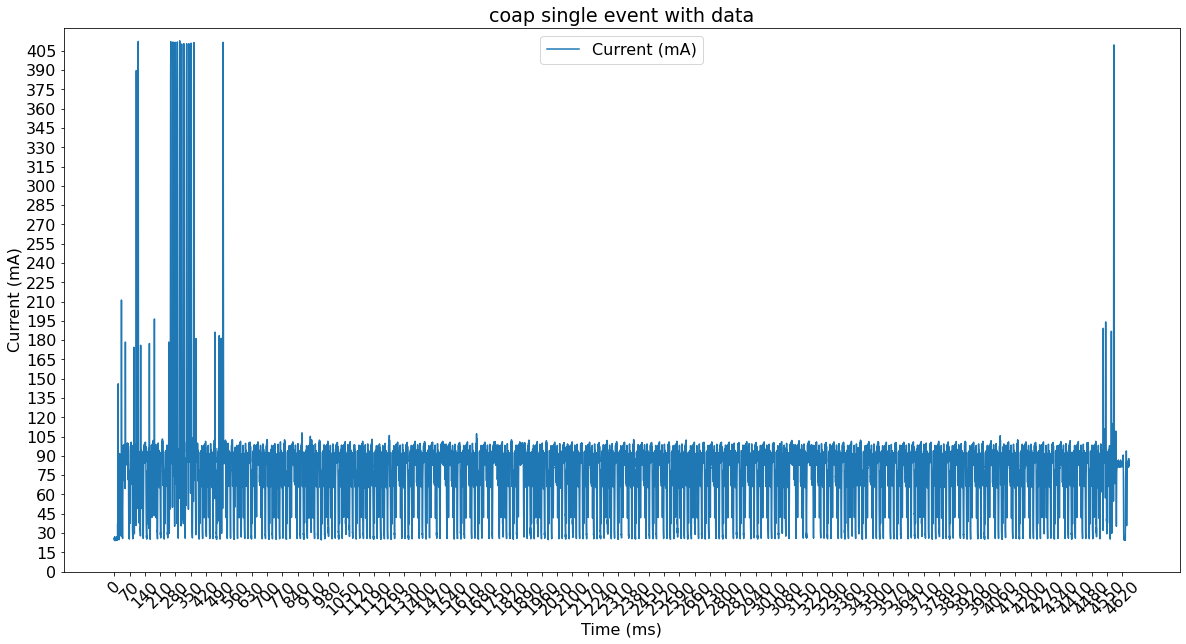

In [87]:
plot_time_range(dataframe=coap_df, title="coap single event with data", time_1=24750, time_2=29400, y_skip=15, x_skip=70)

<ipython-input-76-7a92fe3ea2e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slice_2["Time (ms)"] = data_slice_2["Time (ms)"].apply(lambda x: x - first_val)


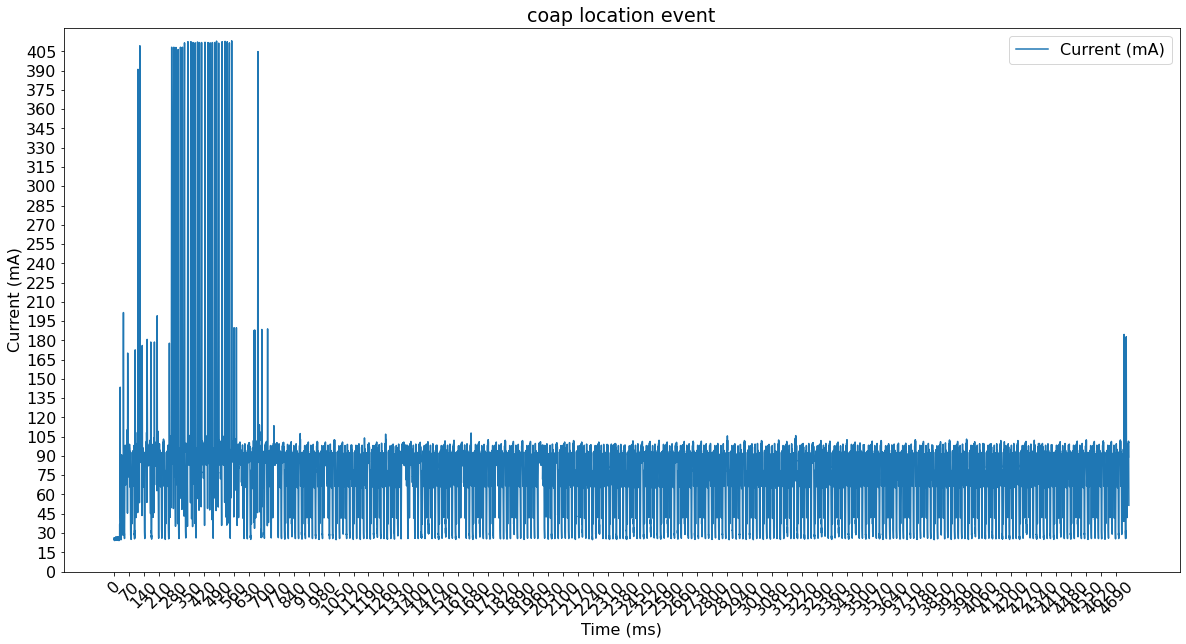

In [88]:
plot_time_range(dataframe=coap_df, title="coap location event", time_1=32500, time_2=37250, y_skip=15, x_skip=70)

<ipython-input-76-7a92fe3ea2e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slice_2["Time (ms)"] = data_slice_2["Time (ms)"].apply(lambda x: x - first_val)


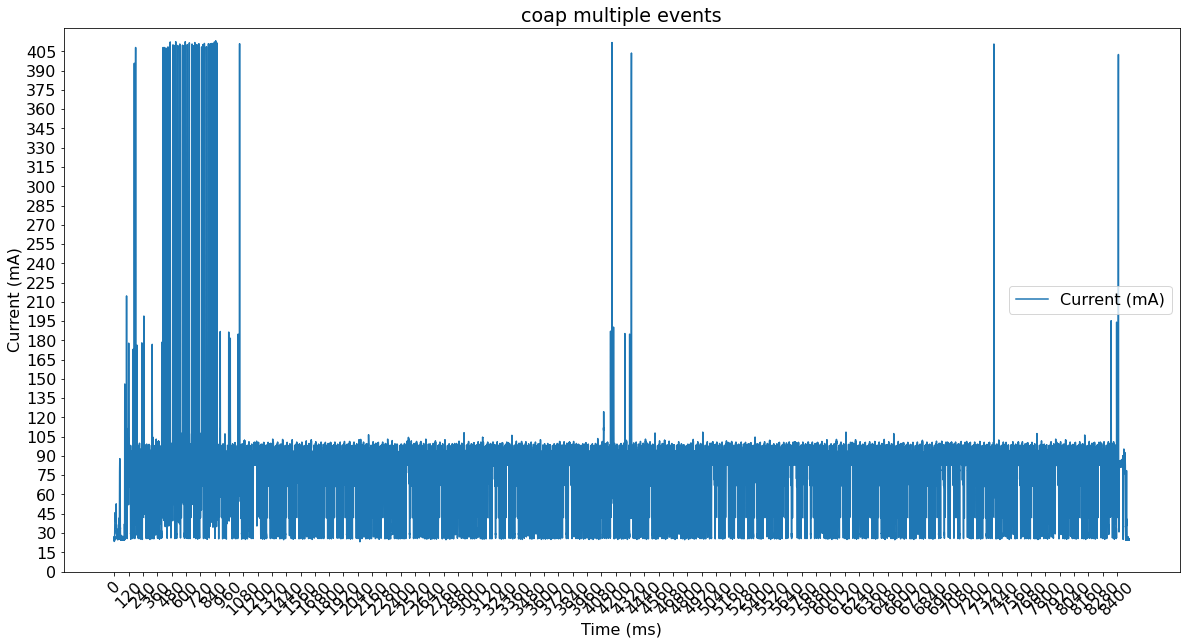

In [89]:
# in this range, coap had to chunk the data into 2 chunks and send them individually
plot_time_range(dataframe=coap_df, title="coap multiple events", time_1=40360, time_2=48860, y_skip=15, x_skip=120)

<ipython-input-76-7a92fe3ea2e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slice_2["Time (ms)"] = data_slice_2["Time (ms)"].apply(lambda x: x - first_val)


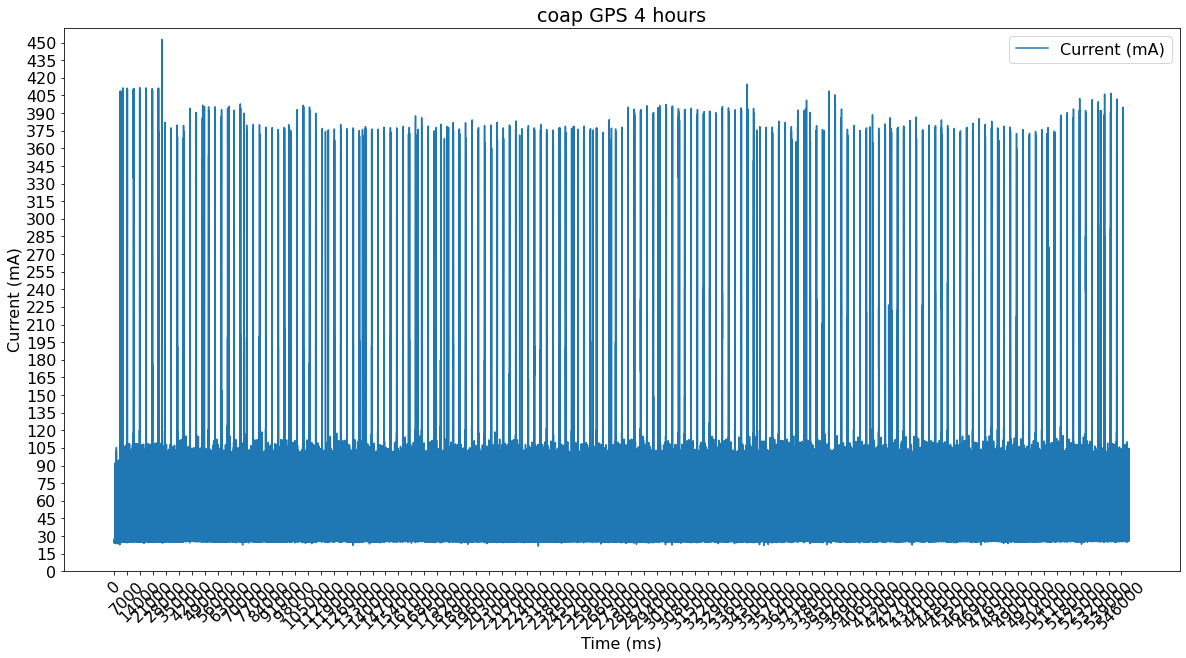

In [90]:
# took so long because the payloads had to be chunked up smaller than the mqtt so it sent less data per transmission
plot_time_range(dataframe=coap_df, title="coap GPS 4 hours", time_1=48860, time_2=598862, y_skip=15, x_skip=7000)

### Summary Wrap Ups for each event

In [91]:
# gives a summary of the current consumption for the specified time range
# get an RMS value for average current consumption over the timeframe
def extract_wrap_up(dataframe, time_1, time_2):
    data_slice_1 = dataframe[dataframe["Time (ms)"] >= time_1]
    data_slice_2 = data_slice_1[data_slice_1["Time (ms)"] <= time_2]
    rms = np.sqrt(np.mean(data_slice_2["Current (mA)"]**2))
    peak = max(data_slice_2["Current (mA)"])
    return rms, peak

In [92]:
# The following dictionary contains the timestamps for the events of interest for the mqtt current consumption measurements
mqtt_events = {"mqtt_connect": [9750, 15050], "mqtt_single_event": [16750, 21700], "mqtt_single_event_w_data": [26300, 31300],
              "mqtt_location_event": [36000, 41300], "mqtt_multiple_events": [46000, 51300], "mqtt_gps_4_hours": [58300, 189000],
              "mqtt_disconnect": [192870, 197550]}

# The following dictionary contains the timestamps for the events of interest for the coap current consumption measurements
coap_events = {"coap_single_event": [17150, 21620], "coap_single_event_w_data": [24750, 29400],
              "coap_location_event": [32500, 37250], "coap_multiple_events": [40360, 48860], 
               "coap_gps_4_hours": [48860, 598862]}

In [93]:
for event in mqtt_events:
    print(event)
    time1 = mqtt_events[event][0]
    time2 = mqtt_events[event][1]
    wrap_up = extract_wrap_up(mqtt_df, time1, time2)
    print("rms value: {} mA".format(wrap_up[0]))
    print("peak value: {} mA".format(wrap_up[1]))
    print("event length: {} ms\n".format(time2-time1))

mqtt_connect
rms value: 80.01644571951736 mA
peak value: 412.349 mA
event length: 5300 ms

mqtt_single_event
rms value: 80.80458697808425 mA
peak value: 412.348 mA
event length: 4950 ms

mqtt_single_event_w_data
rms value: 80.39968913102281 mA
peak value: 411.666 mA
event length: 5000 ms

mqtt_location_event
rms value: 85.47919573941483 mA
peak value: 411.21 mA
event length: 5300 ms

mqtt_multiple_events
rms value: 87.98069821029507 mA
peak value: 412.799 mA
event length: 5300 ms

mqtt_gps_4_hours
rms value: 83.99092682000746 mA
peak value: 413.482 mA
event length: 130700 ms

mqtt_disconnect
rms value: 87.18112414247193 mA
peak value: 471.377 mA
event length: 4680 ms



In [94]:
for event in coap_events:
    print(event)
    time1 = coap_events[event][0]
    time2 = coap_events[event][1]
    wrap_up = extract_wrap_up(coap_df, time1, time2)
    print("rms value: {} mA".format(wrap_up[0]))
    print("peak value: {} mA".format(wrap_up[1]))
    print("event length: {} ms\n".format(time2-time1))

coap_single_event
rms value: 79.93026462913366 mA
peak value: 410.30300000000005 mA
event length: 4470 ms

coap_single_event_w_data
rms value: 81.81181966368172 mA
peak value: 412.8 mA
event length: 4650 ms

coap_location_event
rms value: 85.76172918545966 mA
peak value: 413.254 mA
event length: 4750 ms

coap_multiple_events
rms value: 83.85542511598186 mA
peak value: 413.255 mA
event length: 8500 ms

coap_gps_4_hours
rms value: 80.57300880149134 mA
peak value: 452.759 mA
event length: 550002 ms



In [95]:
def compare_time_ranges(df1, df2, title, time_range_1, time_range_2):
    time_col = "Time (ms)"
    current_col = "Current (mA)"
    data_1 = df1[df1[time_col] >= time_range_1[0]]
    data_2 = data_1[data_1[time_col] < time_range_1[1]]
    first_val = data_2['Time (ms)'].iloc[0]
    data_2["Time (ms)"] = data_2["Time (ms)"].apply(lambda x: x - first_val)
    plt.plot(data_2[time_col], data_2[current_col], label="mqtt current", alpha=0.5)
    data_1 = df2[df2[time_col] >= time_range_2[0]]
    data_2 = data_1[data_1[time_col] < time_range_2[1]]
    first_val = data_2['Time (ms)'].iloc[0]
    data_2["Time (ms)"] = data_2["Time (ms)"].apply(lambda x: x - first_val)    
    plt.plot(data_2[time_col], data_2[current_col], label="coap current", alpha=0.5)
    plt.xlabel(time_col)
    plt.ylabel(current_col)
    plt.xlim([-20, max(time_range_1[1]-time_range_1[0],time_range_2[1]-time_range_2[0]) + 20])
    plt.locator_params(axis="x", nbins=70)
    plt.locator_params(axis="y", nbins=25)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.title(title)

<ipython-input-95-f0df6b9d8986>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["Time (ms)"] = data_2["Time (ms)"].apply(lambda x: x - first_val)
<ipython-input-95-f0df6b9d8986>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["Time (ms)"] = data_2["Time (ms)"].apply(lambda x: x - first_val)


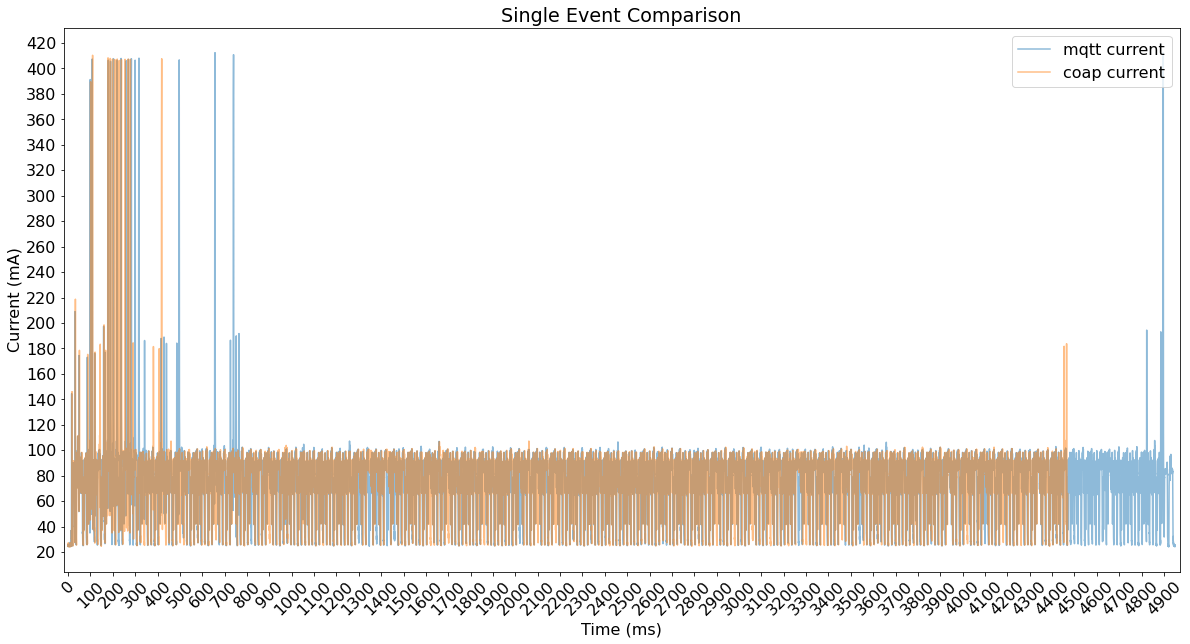

In [96]:
compare_time_ranges(mqtt_df, coap_df, "Single Event Comparison", mqtt_events["mqtt_single_event"], coap_events["coap_single_event"])
plt.savefig('single_event_comparison.png', bbox_inches='tight')

<ipython-input-95-f0df6b9d8986>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["Time (ms)"] = data_2["Time (ms)"].apply(lambda x: x - first_val)
<ipython-input-95-f0df6b9d8986>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["Time (ms)"] = data_2["Time (ms)"].apply(lambda x: x - first_val)


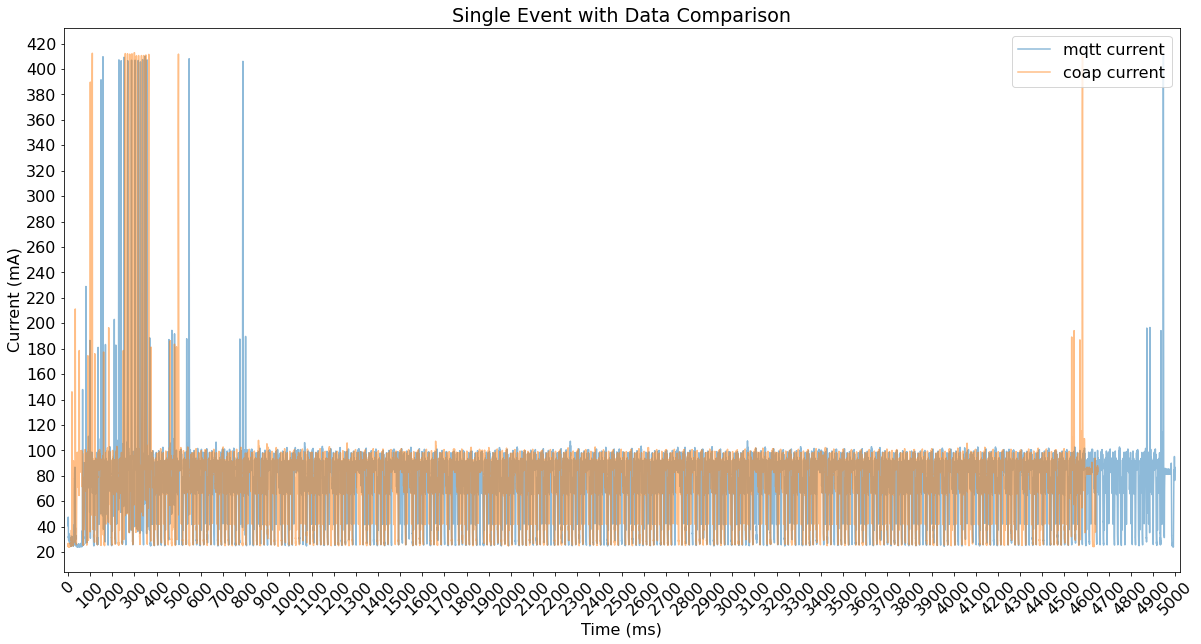

In [97]:
compare_time_ranges(mqtt_df, coap_df, "Single Event with Data Comparison", mqtt_events["mqtt_single_event_w_data"], coap_events["coap_single_event_w_data"])
plt.savefig('single_event_w_data_comparison.png', bbox_inches='tight')

<ipython-input-95-f0df6b9d8986>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["Time (ms)"] = data_2["Time (ms)"].apply(lambda x: x - first_val)
<ipython-input-95-f0df6b9d8986>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["Time (ms)"] = data_2["Time (ms)"].apply(lambda x: x - first_val)


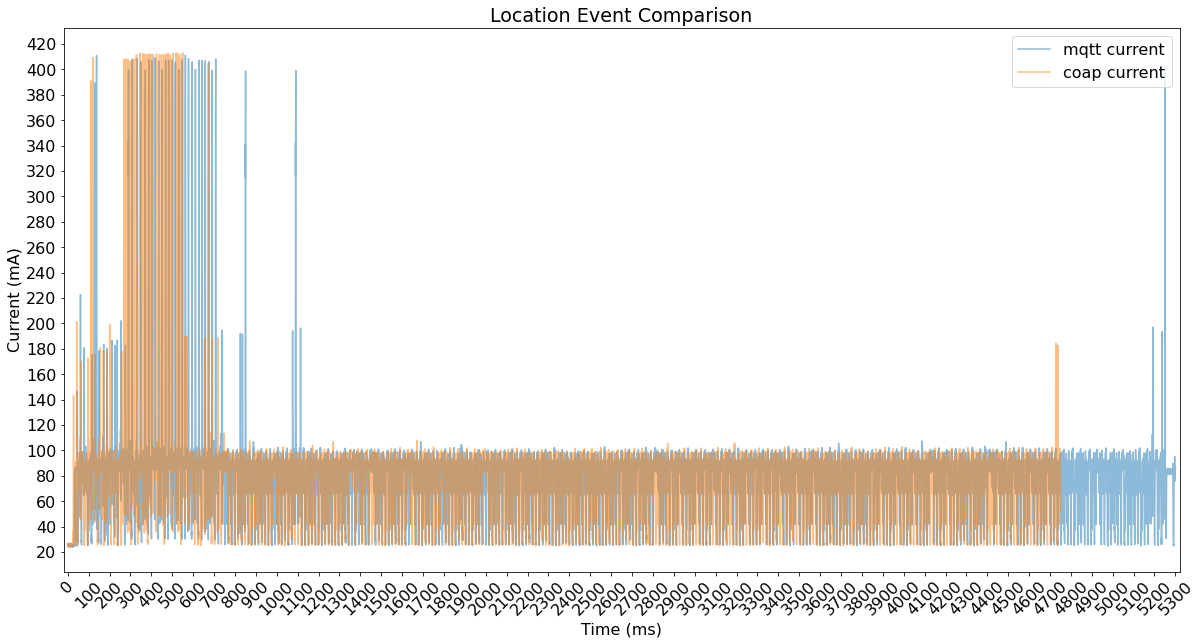

In [98]:
compare_time_ranges(mqtt_df, coap_df, "Location Event Comparison", mqtt_events["mqtt_location_event"], coap_events["coap_location_event"])
plt.savefig('location_event_comparison.png', bbox_inches='tight')

<ipython-input-95-f0df6b9d8986>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["Time (ms)"] = data_2["Time (ms)"].apply(lambda x: x - first_val)
<ipython-input-95-f0df6b9d8986>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["Time (ms)"] = data_2["Time (ms)"].apply(lambda x: x - first_val)


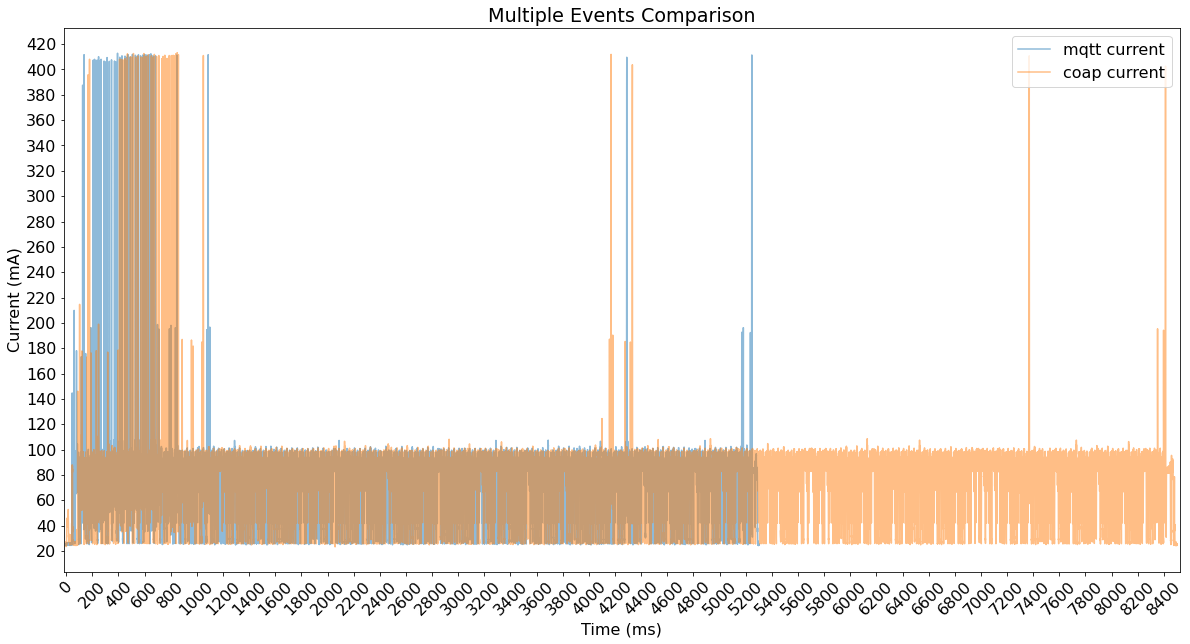

In [99]:
compare_time_ranges(mqtt_df, coap_df, "Multiple Events Comparison", mqtt_events["mqtt_multiple_events"], coap_events["coap_multiple_events"])
plt.savefig('multiple_events_comparison.png', bbox_inches='tight')

<ipython-input-95-f0df6b9d8986>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["Time (ms)"] = data_2["Time (ms)"].apply(lambda x: x - first_val)
<ipython-input-95-f0df6b9d8986>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["Time (ms)"] = data_2["Time (ms)"].apply(lambda x: x - first_val)


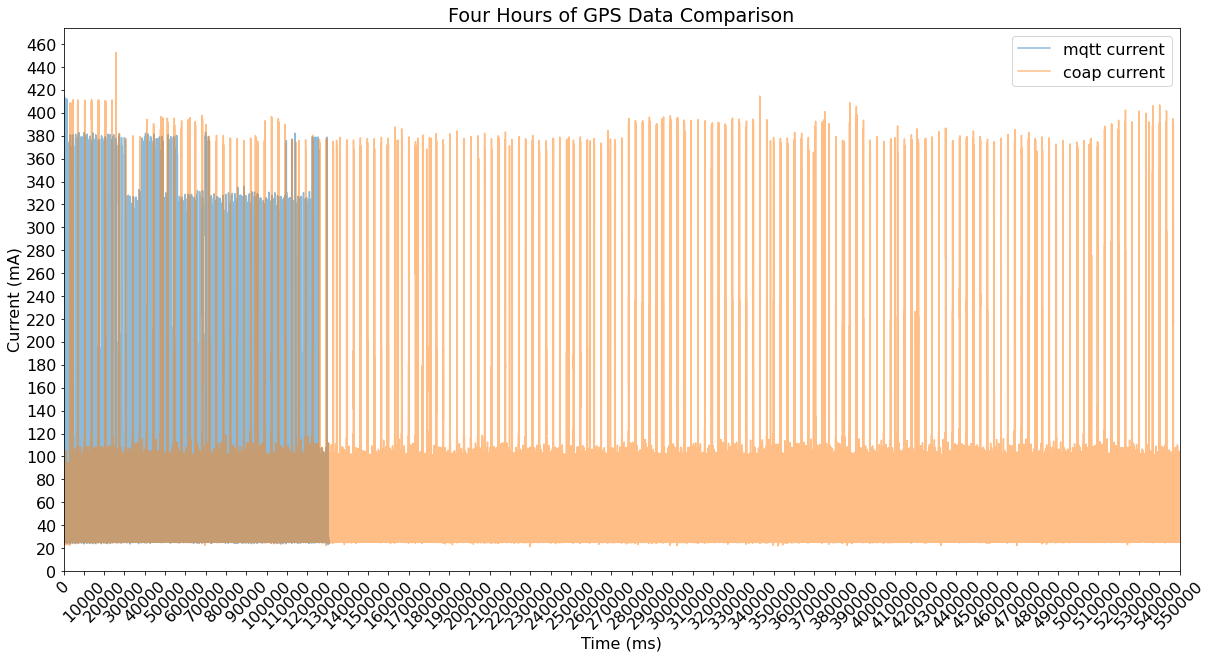

In [100]:
compare_time_ranges(mqtt_df, coap_df, "Four Hours of GPS Data Comparison", mqtt_events["mqtt_gps_4_hours"], coap_events["coap_gps_4_hours"])
plt.savefig('gps_4_hours_comparison.png', bbox_inches='tight')